<a href="https://colab.research.google.com/github/abelmathew28/CS482/blob/main/Probability_Theory/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**a.** Calculate the probabilitiy of the counts of outcome "2" if the possible **equally Probable** outcomes are all interger numbers between 1 and 10 and we performed n = 1000 trails.


In [19]:
# Import the required library numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## np.random.multinomial(n, p)

This function runs to perform experiement with one of p possible outcomes. Here p is a probability list(containing p elements) for each of p values of multinomial outcome.

This function will draw and return counts, X_i = [X_0, X_1, ..., X_p], represent the number of times the outcome was i. Thus we can see that summation of X_i will be equal to n.

In [20]:
# Generating the random number between 1 to 10, when probability of each number is 1/10 (equally Probable)

random_1_to_10 = np.random.multinomial(n=1000, pvals=[1/10]*10)
random_1_to_10

array([103,  89,  92, 117,  97, 104,  92,  90, 127,  89])

In [21]:
# Probability of getting "2" when we performed random selection 1000 times is calcuilated below

probOf2 = random_1_to_10[1]/ sum(random_1_to_10)
probOf2

0.089

**b.** 
1. Simulate n independent trails of the multinoulli (categorical distribution) compliant to the specification of (a). 

2. Plot the probability in (a) as a function of n independent trails (n=10-1000).

3. Write your conclusion with respect to the behavior of the estimated probability as n increases.

In [22]:
# This code is to simiulate n independent trails where n ranges between 10 and 1000
# We will compute the probability for number "2" for each value of n and collect the probabilities in a list

listOfProbability = []
for n in range(10,1001):
  x = np.random.multinomial(n=n, pvals=[1/10]*10)
  listOfProbability.append(x[1]/n)

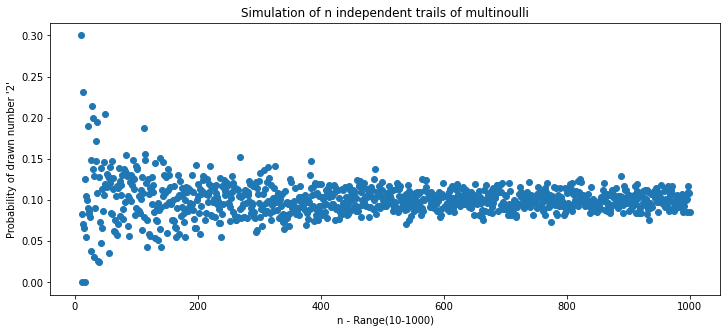

In [23]:
# Here we want to plot the distribution of probability calculated above to provide inferences about the result.
plt.rcParams["figure.figsize"] = (12,5)
plt.scatter(range(10,1001), listOfProbability)
plt.xlabel('n - Range(10-1000)')
plt.ylabel("Probability of drawn number '2'")
plt.title('Simulation of n independent trails of multinoulli')
plt.show()

### Observations
1. Above plot shows when the values of n is low the scatter is wide and when the n is large then scatter plot seems more dense.
2. Mean probability seems to be around .1, which is also expected value when we started with equally probable distribution.
3. We can translate this dense in terms of variance and make below conclusions.

### Mean value of probabilities

In [24]:
print(f'Overall mean value of probabilities is {round(np.mean(listOfProbability),5)} - which is almost equal to expected value of 0.1')

Overall mean value of probabilities is 0.10089 - which is almost equal to expected value of 0.1


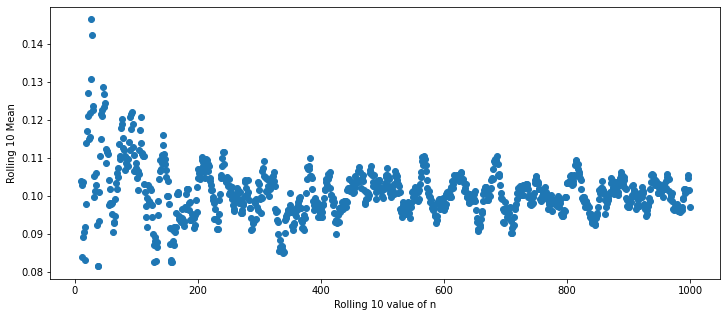

In [25]:
# In order to get better inference on mean we are calculating the rolling mean of 10 data points.
listOfRollingMean = []
for i in range(10,1000):
  mean = np.mean(listOfProbability[i-10:i])
  listOfRollingMean.append(mean)

plt.scatter(range(10,1000), listOfRollingMean);
plt.xlabel('Rolling 10 value of n')
plt.ylabel('Rolling 10 Mean')
plt.show()

#### Conclusion
With lower value of n the mean values have high variance and with large value of n mean value is trying to close around 0.1

### Variance of probabilities 

In [26]:
print(f'Variance of probabilities is {round(np.var(listOfProbability),5)}')

Variance of probabilities is 0.00043


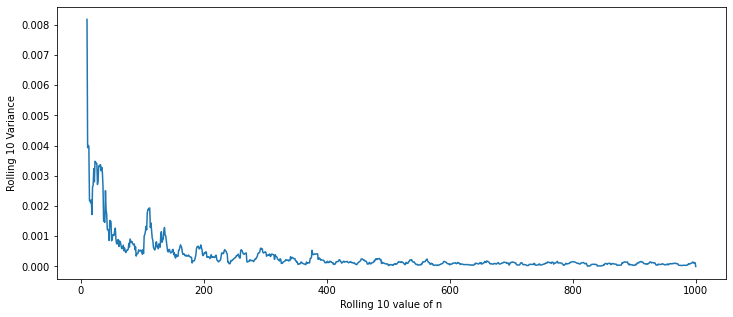

In [27]:
# In order to get better inference on mean we are calculating the rolling mean of 10 data points.
listOfRollingVariance = []
for i in range(10,1001):
  var = np.var(listOfProbability[i-10:i])
  listOfRollingVariance.append(var)

plt.plot(range(10,1001), listOfRollingVariance)
plt.xlabel('Rolling 10 value of n')
plt.ylabel('Rolling 10 Variance')
plt.show()

#### Conclusion

Variance of probability shows a elbow curve where we can see that low n (n < 200) variance is more and gradually variance is dropping and trying to close near to 0.0 when value of n increases.